<a href="https://colab.research.google.com/github/JoDeMiro/InteractiveDemo/blob/main/Jupyter_Notebook_Interactive_Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=jln6h-dE2-0

## Interactive Demo

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

from scipy.optimize import curve_fit as cf

## Variables

In [10]:
N_samples = 100
x = np.linspace(-2, 2, N_samples)

## Function definitions (ideal fitting function and actual data generating function with noise)

In [11]:
def f(x, a, mu, sigma):
    r = a * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return (r)

In [12]:
def func(amplitude, ideal_mu, ideal_sigma, noise_sd, noise_mean):
    r = amplitude * np.exp(-(x - ideal_mu)**2 / (2 * ideal_sigma**2))
    
    plt.figure(figsize=(8,5))
    plt.plot(x, r, c = 'k', lw = 3)
    r = r + np.random.normal(loc = noise_mean, scale = noise_sd, size = N_samples)
    plt.scatter(x , r, edgecolors = 'k', c = 'yellow', s = 60)
    plt.grid(True)
    plt.show()
    return (r)

## Call the 'interactive' widget with the data generating function, which also plots the data real-time

Play with the 'noise_sd' and 'noise_mean' parameters to see how they impact the estimation (curve-fit) accuracy

In [18]:
y = interactive(func, amplitude = [1,2,3,4,5],
                ideal_mu = (-5, 5, 0.1),
                ideal_sigma = (0, 2, 0.1),
                noise_sd = (0, 1, 0.01),
                noise_mean = (-1, 1, 0.1))
display(y)

interactive(children=(Dropdown(description='amplitude', options=(1, 2, 3, 4, 5), value=1), FloatSlider(value=0…

## Run curve-fitting optimizer to estimate parameters, store, and plot

data comes from the `y.result` which is the return value of the `f()`

           Original Params  Estimated Params
Amplitude              1.0          0.811563
Mean                   0.0          0.026130
Std.Dev                1.0          0.838143


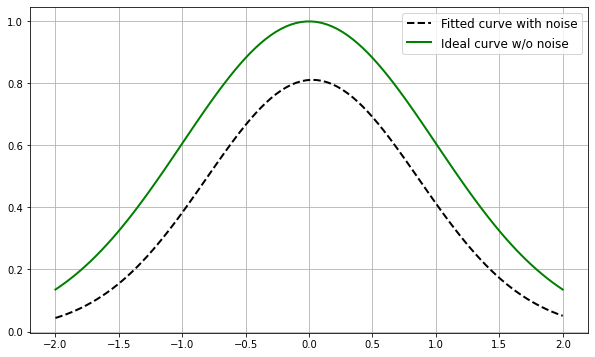

In [26]:

# Curve-fit optimizer
p = y.result
p1, _ = cf(f, xdata = x, ydata = p)
par_lst = list(p1)

# Gather ideal parameters from the interactive widget object
p2 = list(y.kwargs.values())
p3 = p2[0:3]

# Make the data matrix
data = np.array([p3, par_lst])

# Put it in a Data Frame
df = pd.DataFrame(data = data.T,
                  index=['Amplitude','Mean','Std.Dev'],
                  columns=['Original Params','Estimated Params'])
print(df)

# Plot the ideal and estimated curves
plt.figure(figsize=(10,6))
plt.plot(x, f(x, par_lst[0], par_lst[1], par_lst[2]), 'k--', lw = 2)
plt.plot(x, f(x, p3[0], p3[1], p3[2]), c = 'green', lw = 2)
plt.legend(['Fitted curve with noise','Ideal curve w/o noise'], fontsize = 12)
plt.grid(True)
plt.show()